In [1]:
import numpy as np
import pytesseract 
from PIL import Image


In [2]:
def image_to_ocr_data(image_path):
    image = Image.open(image_path).convert("RGB")
    width, height = image.size
    w_scale = 1000/width
    h_scale = 1000/height
    ocr_df = pytesseract.image_to_data(image, output_type='data.frame')        
    ocr_df = ocr_df.dropna().assign(left_scaled = ocr_df.left*w_scale,
                        top_scaled = ocr_df.top*h_scale,
                        width_scaled = ocr_df.width*w_scale,
                        height_scaled = ocr_df.height*h_scale,
                        right_scaled = lambda x: x.left_scaled + x.width_scaled,
                        bottom_scaled = lambda x: x.top_scaled + x.height_scaled)

    float_cols = ocr_df.select_dtypes('float').columns
    ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
    ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
    ocr_df = ocr_df.dropna().reset_index(drop=True)
    return ocr_df

In [6]:
image_path = "../data/raw/extract-scan.png"

/home/myihbach/.local/lib/python3.8/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


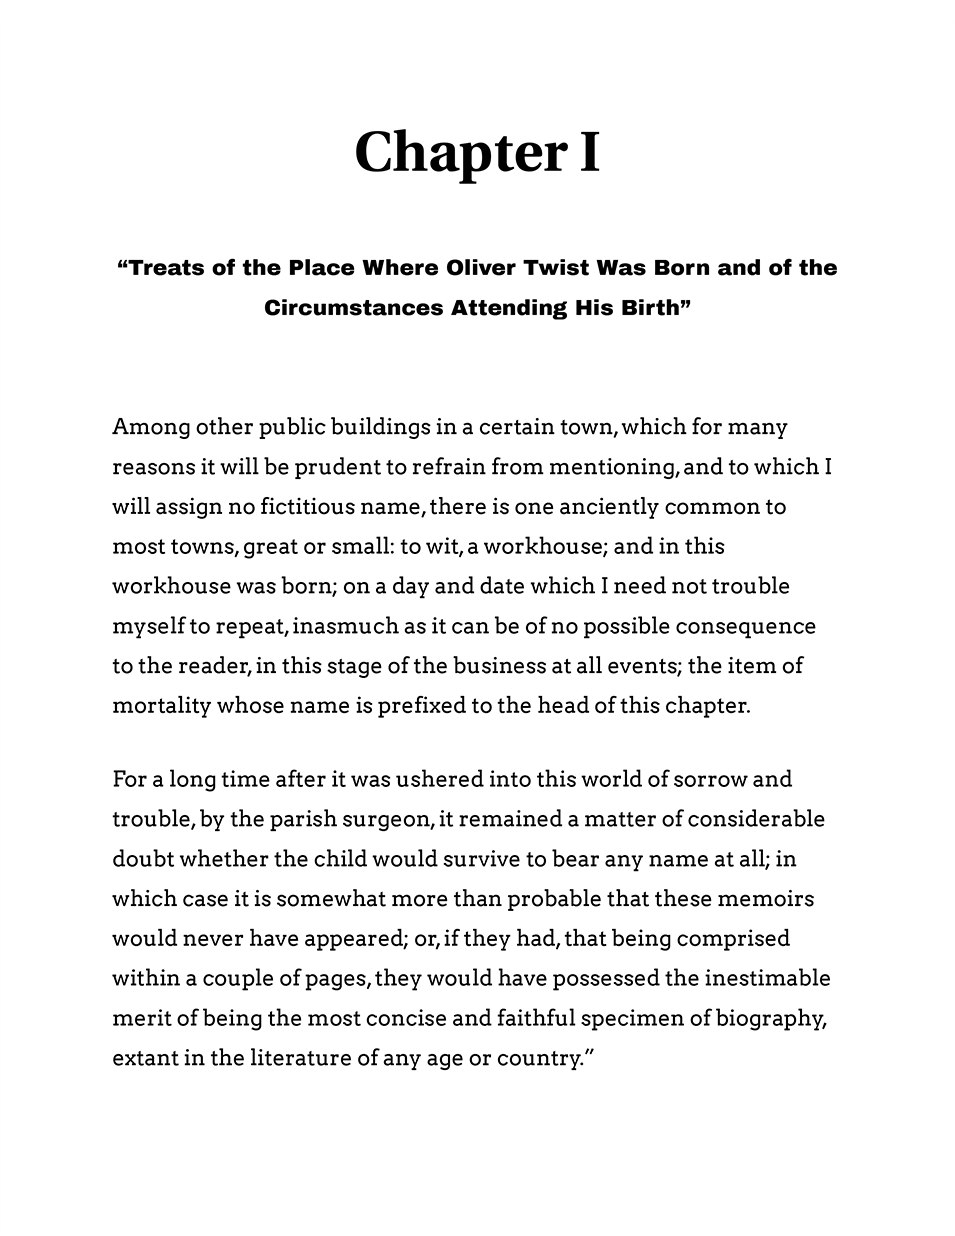

In [7]:
Image.open(image_path).convert("RGB")

In [8]:
image_to_ocr_data(image_path)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,left_scaled,top_scaled,width_scaled,height_scaled,right_scaled,bottom_scaled
0,5,1,1,1,1,1,356,129,212,55,96,Chapter,373,104,222,44,595,149
1,5,1,1,1,1,2,581,132,18,39,96,I,608,107,19,32,627,138
2,5,1,2,1,1,1,118,260,86,15,96,“Treats,124,210,90,12,214,222
3,5,1,2,1,1,2,213,259,22,16,96,of,223,210,23,13,246,222
4,5,1,2,1,1,3,243,259,37,16,96,the,254,210,39,13,293,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,5,1,7,1,1,5,358,1048,22,18,96,of,375,848,23,15,398,862
202,5,1,7,1,1,6,384,1054,37,16,96,any,402,853,39,13,441,866
203,5,1,7,1,1,7,428,1054,35,16,96,age,448,853,37,13,485,866
204,5,1,7,1,1,8,470,1054,21,12,95,or,492,853,22,10,514,862
